In [1]:
from natorch.nn.modules.container import Sequential
from natorch.nn.modules import Dense, Conv2d, MaxPool2d, BatchNorm2d, AvgPool2d, Flatten
from natorch.nn.modules.activation import Tanh, Softmax

# Use sequential test with mnist dataset, recognize the digit

conv2d -> tanh -> pool -> conv2d -> tanh -> pool -> conv2d -> tanh -> flatten -> dense -> tanh -> dense -> softmax

### Define model

##### Add layers

In [2]:
model = Sequential()

In [3]:
model.add(Conv2d(1, 6, kernel_size=5, stride=1, padding=0))

In [4]:
model.add(Tanh())

In [5]:
model.add(AvgPool2d(2, stride=2))

In [6]:
model.add(Conv2d(6, 16, kernel_size=5, stride=1, padding=0))

In [7]:
model.add(Tanh())

In [8]:
model.add(AvgPool2d(2, stride=2))

In [9]:
model.add(Conv2d(16, 120, kernel_size=5, stride=1, padding=0))

In [10]:
model.add(Tanh())

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(120, 84))

In [13]:
model.add(Tanh())

In [14]:
model.add(Dense(84, 10))

In [15]:
model.add(Softmax())

or :
```python
model = Sequential(
    Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
    Tanh(),
    AvgPool2d(2, stride=2),
    Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
    Tanh(),
    AvgPool2d(2, stride=2),
    Conv2d(16, 120, kernel_size=5, stride=1, padding=0),
    Tanh(),
    Flatten(), 
    Dense(120, 84), 
    Tanh(),
    Dense(84, 10), 
    Softmax()
)
```

### Take MNIST Sample 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data_path = '../../data/MNIST/MNIST.csv'

In [18]:
data = pd.read_csv(data_path)
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


pick a sample

In [20]:
x_sample = data.iloc[0, 1:]
y_sample = data.iloc[0, 0]
x_sample.shape, y_sample.shape

((784,), ())

pad x from (28, 28) -> (32, 32) to match the model

In [21]:
x_sample = x_sample.to_numpy().reshape(28, 28)
x_sample = np.pad(x_sample, pad_width = 2, mode='constant', constant_values = 0)
x_sample.shape

(32, 32)

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

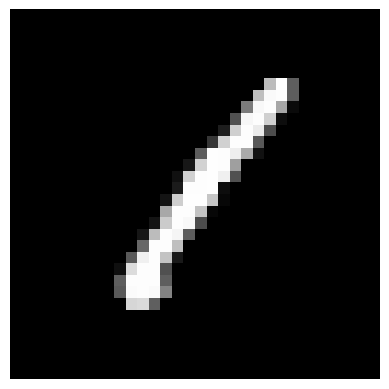

In [22]:
plt.imshow(x_sample, cmap='gray')
plt.axis("off")

In [23]:
x_sample = x_sample.reshape(1, 1, 32, 32)
x_sample = x_sample/255.0
x_sample.shape

(1, 1, 32, 32)

### Feed-Forward Pass

In [24]:
pred = model.forward(x_sample)
pred.shape

(10,)

In [25]:
pred

array([6.40011488e-02, 3.35630490e-01, 1.24456689e-04, 3.06410185e-02,
       1.10105708e-03, 4.49776991e-01, 1.51865844e-02, 8.43244612e-03,
       1.65954647e-02, 7.85103429e-02])

### Loss 

In [26]:
from natorch.nn.modules.losses import CrossEntropyLoss
from natorch.utils.data import one_hot

one-hot for label

In [27]:
y_sample = one_hot(y_sample, num_classes = 10)
print(y_sample)
print(y_sample.shape)

[0 1 0 0 0 0 0 0 0 0]
(10,)


define loss function

In [28]:
loss_fn = CrossEntropyLoss()

In [29]:
loss = loss_fn.forward(pred, y_sample)
loss

np.float64(2.3236239394603126)

grad_out

In [30]:
grad_out = loss_fn.backward()
grad_out

array([-0.90470585, -0.87496449,  0.08939741,  0.09216756,  0.08948476,
        0.14015434,  0.09075412,  0.09014322,  0.09088207,  0.09668687])

### Backpropagation

In [31]:
grad_input = model.backward(grad_out)